<a href="https://colab.research.google.com/github/syahreza0511/Pemrograman_Python_Tugas10/blob/main/PemrogramanPython11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [73]:
ls

dataset/  GMB_05/  nmodel_scene/  PemrogramanPython11.ipynb


In [74]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [75]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [76]:
for imagePath in imagePaths:
  # load the input image from disk, resize it to 64x64 pixels, scale
  # the pixel intensities to the range [0, 1], and then update our
  # image list
  image = Image.open(imagePath)
  # prepocessing
  image = np.array(image.resize((64, 64))) / 255.0
  data.append(image)
  # extract the class label from the file path and update the
  #label list
  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)

In [50]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [51]:
# encode the labes, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [52]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [53]:
# perform a training and testing split, using 76% of the data for
# training and 24% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.24, shuffle=True)
print(trainX.shape)
print(testX.shape)

(443, 64, 64, 3)
(141, 64, 64, 3)


In [54]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8,(3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16,(3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
# fully connected layers
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               313700    
_________________________________________________________________
dense_5 (Dense)              (None, 5)                

In [55]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
     Flatten(input_shape=(64*64*3,)),
     Dense(100, activation="relu", name="layer1"),
     Dense(16, activation="relu", name="layer2"),
     Dense(16, activation="relu", name="layer3"),
     Dense(3, activation="softmax", name="layer4"),
    ]
)

In [56]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               1228900   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 1,230,839
Trainable params: 1,230,839
Non-trainable params: 0
_________________________________________________________________


In [66]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=30, batch_size=32)

[INFO] training network...
Epoch 1/30
14/14 [==============================] - 1s 78ms/step - loss: 0.2138 - accuracy: 0.9278 - val_loss: 0.6588 - val_accuracy: 0.7872
Epoch 2/30
14/14 [==============================] - 1s 70ms/step - loss: 0.0921 - accuracy: 0.9910 - val_loss: 0.6118 - val_accuracy: 0.8440
Epoch 3/30
14/14 [==============================] - 1s 66ms/step - loss: 0.0673 - accuracy: 0.9887 - val_loss: 0.6702 - val_accuracy: 0.8085
Epoch 4/30
14/14 [==============================] - 1s 67ms/step - loss: 0.0596 - accuracy: 0.9910 - val_loss: 0.7712 - val_accuracy: 0.8014
Epoch 5/30
14/14 [==============================] - 1s 69ms/step - loss: 0.0840 - accuracy: 0.9797 - val_loss: 0.7017 - val_accuracy: 0.7872
Epoch 6/30
14/14 [==============================] - 1s 67ms/step - loss: 0.0895 - accuracy: 0.9752 - val_loss: 0.8432 - val_accuracy: 0.7092
Epoch 7/30
14/14 [==============================] - 1s 67ms/step - loss: 0.0889 - accuracy: 0.9752 - val_loss: 0.7720 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


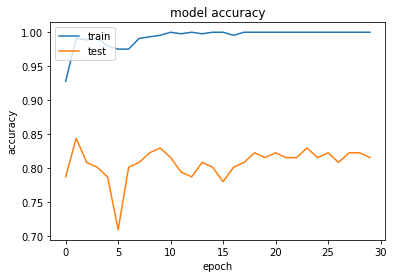

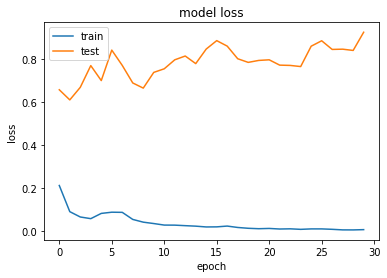

In [67]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [68]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       1.00      0.70      0.82        30
      GMB_02       0.77      0.90      0.83        30
      GMB_03       0.86      0.92      0.89        26
      GMB_04       0.72      0.90      0.80        31
      GMB_05       0.83      0.62      0.71        24

    accuracy                           0.82       141
   macro avg       0.84      0.81      0.81       141
weighted avg       0.83      0.82      0.81       141



In [69]:
model1.save('nmodel_scene')

INFO:tensorflow:Assets written to: nmodel_scene/assets


In [77]:
import cv2
import matplotlib.pyplot as plt
image1='test1.jpg'

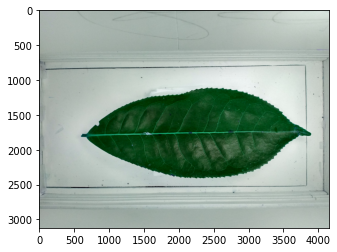

In [78]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [80]:
image_testing = Image.open('test1.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [81]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [82]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[1.4283297e-05 5.9206622e-09 2.5940529e-11 1.8888173e-06 9.9998379e-01]]
['GMB_05']
